1. search_images (ddgs)
2. download images (fastcore?)
3. build dls (DataBlock(..).dataloaders(path))
4. build Learner
5. inference

In [7]:
!pip install -Uqq duckduckgo_search

In [8]:
from fastcore.all import * 
from duckduckgo_search import DDGS

In [9]:
def search_images(term, max_images=100):
    with DDGS(headers = {'Accept-Encoding': 'deflate, gzip, br'}) as ddgs:
        results = ddgs.images(keywords=term)
        images = [next(results).get("image") for _ in range(max_images)]
    return L(images)

In [8]:
img = search_images("cute dog", max_images=100)
img[0]

'https://inspirationseek.com/wp-content/uploads/2016/02/Cute-Dog-Photo.jpg'

In [10]:
from fastdownload import download_url

import os

In [9]:
download_url(url=img[0], dest='cute-dog.jpg', show_progress=False)

Path('cute-dog.jpg')

In [11]:
from fastai.vision.all import *

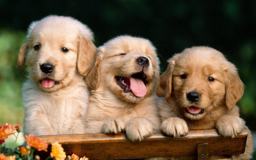

In [10]:
i = Image.open("cute-dog.jpg")
i.to_thumb(256)

In [16]:
path = Path("reproduce-bird-or-not")

In [12]:
from time import sleep
searches = "forest", "bird"

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest=dest, urls=search_images(f"{o} photos"))
    sleep(100)
    download_images(dest=dest, urls=search_images(f"{o} sun photos"))
    sleep(100)
    download_images(dest=dest, urls=search_images(f"{o} flower photos"))
    sleep(100)
    resize_images(path/o, max_size=400, dest=dest)

APIException: _get_url() https://duckduckgo.com/i.js

In [13]:
broken = verify_images(get_image_files(path))
broken.map(Path.unlink)
len(broken)

0

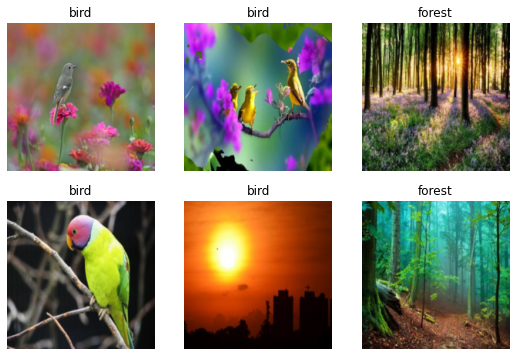

In [17]:
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock), 
    get_items=get_image_files,
    get_y=parent_label,
    splitter=RandomSplitter(valid_pct=0.2, seed=42069),
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [18]:
from fastai.vision.all import *

learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.572386,0.176249,0.046875,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.039510,0.044735,0.023438,00:03
1,0.023461,0.046729,0.015625,00:03
2,0.021984,0.080856,0.015625,00:03
